# Open Science Workshop: Jupyter notebooks


<img src="images/bioconda-badge-tall.png">

What's a Jupyter notebook?

* It was formerly called Ipython notebook. Now **JUlia**, **PYThon**, and **R** making up Jupyter.
* It enables you to write live code and execute it in "cells", add markdown, visualizations, run applications and more in one place.
* The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. [Jupyter site](https://jupyter.org/)


### Navigating Jupyter Notebooks

First steps

In [ ]:
# creating a cell above
# Shortcut Esc + A

In [ ]:
# creating a cell below
# Shortcut Esc + B

In [ ]:
# executing in a cell 
# a shortcut command to run the cell below is presenting Shift + Enter
2 * 2

In [ ]:
# writing a string and storing it for later
# notice something strange about these two sequences
string = "ATGCGGGCCG"
string2 = "TAA"

In [ ]:
# show the contents of the string
print(string); print(string2)

In [ ]:
# combine the two strings together
string + string2

In [ ]:
# deleting a cell
# Use the menu above with the scissors icon/ use the Esc + D
# make sure the cursor is in the cell below
"MAMAPRTEINSTRING"

In [ ]:
# How to save your work
# same old cmd + s

In [ ]:
# Searching for text in a long document
# find and replace Esc + F

In [ ]:
# See other keyboard shortcuts
# Esc + h

### Coverage

1. Styling
2. Extensions
3. Magics
4. Interactive visualizations and data exploration tools

# Styling

Changing the appearance of the notebook to suit your style

# Extensions

In [1]:
# how to print output to screen
# split cells
print ("Hello world!")

Hello world!


In [2]:
print("This is bioinformatics tutorial")

This is bioinformatics tutorial


In [4]:
# Python2 to Python 3 conversion

'''
this is a python program that computes the gc content from the pseudocode and a function to automates the whole process
'''

# read DNA sequence from the user or use raw_input
dna = "atcggcgcacgctcgcgcggcgatagctgatcggctttttttttaaaag"

# count the number of C's in the dna sequence
no_g = dna.count("c")

# count the number of G's in the dna sequence
no_c = dna.count("g")

# Determine the length of the dna sequence
dna_length = len(dna)

# Compute the GC%
gc_percent = (no_c+no_g) * 100.0 /dna_length

def gc(dna):
	'''this is a function that computes the gc percentage
    return the a floating point number with the percentage'''
	ns = dna.count('n') + dna.count('N')
	gcpercent = float(dna.count('c') + dna.count('C') + dna.count('g') + dna.count('G'))* 100// (len(dna) - ns)
	return gcpercent

# making the output understandable
dna = input("Enter your DNA sequence, please :") # don't include the brackets it will throw an error
print(gc(dna)) # see your results

Enter your DNA sequence, please :tcggctttttttttaaaa
22.0


In [5]:
# Limiting output

# This is a made up DNA sequence using a pseudorandom algorithm
import random  # come forth variables and functions from the module
'''This just allows me to make up an artifical dna sequence with 1000 reads'''
dna = ""  # an empty string, which will be populated by a long string
for _ in range(20000):  # for nothing in the range 0 - 20000, this is loop
    dna += random.choice(
        "ACGT")  # storing the results back into variable for future use
print(("".join(dna)))
"It's definately " + str(
    len(dna))  # concatenating the string and confirming the no of characters

CCCTTAATCGGTCGTCTGGCTAGCGCTCGGCTAGCGGTATCCGTCAAGGGTAGAATGCAAGGCGTATTCGAATGAATCCGAATTATGTTAAGAAGTACCTGGGATCAGGGCTCAGCACTGATGGCCCCCCGAAAGCTCGCAGTTTGCCACCCGTTTACCGCGACAGGGCCCCGAAGTTAAGGGACTCGCCATGGCAAAATGAACAAGGTCCGTGCGGAGTTCAAGCACCACTCGATGGATAGAAGACCTTCCGTAATCACATGTGGACAGTCTGCGTGGTATCAGTACAAGAGAAGTGCTGTTAGAGCGTCACCACGCACTCGGTTTGGTTTCTTGACCCTACGAATACGTGTCCCCAATGACTCCGCTGGAGAATTGTGCAGACTCTTTACCTAAAGGACGTAGCTCTCGCGGCCATCGGAGGGGCGAAAGCTGTTTTGCCATCCACGTAAATTGCTGATACGTGAGCCGACGATCAGTCGTTAGGCGGAGCTTATCGTTCAAGGGTCCTGGTTTGCGGCTGAGTAAGTGCTCTATGGTTGCTACGGCCGCCCGTTCATGATTTCGTACTGCATACCTGCCAAGATTAGCCCAGCGCCAAGCAACGAGGAAGCAGATCCTACGTTAGACCTTAATTAGCGTAAATAAACATCACGACGGCCTCTGACCTTTCTAAGCGAAAGAATGGACCTATAGGCACTGTACTGCGAGTGTCGGAACACACGTTGTGGAGGCGTCTGGATAGCTCCTCGTCAAACGTGTCCTTTGCTATAGAGGCCCGCTCAGGTTGGAGGTGCACACCGTCCGTGTACGCCAGAATATGGCAAATTCTGGTCGTTCATTTAATGAAAACATGCTTATCGTTTCAGAGTGACTTGATATGGTGCCCCCACAGCTCGGGCGTGCGATTAGATCTATATAAGAGCACCGGGTTTCGGGAGTGTCGGCGAGCATTGTGTGATAGCGTAGATAACAGGCCAGGATAAACCGGCAACCTGCG

"It's definately 20000"

In [6]:
# Hiding
# this is a very long function to do string matching which is very common
# credit: Ben Langmead
# credit: Gusfield, Dan. Algorithms on strings, trees and sequences: computer science and computational biology. Cambridge university press, 1997.
import string

def z_array(s):
    """ Use Z algorithm (Gusfield theorem 1.4.1) to preprocess s """
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s)-1)
    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i-k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: Zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r+1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z


def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]


def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p)-1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp


def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i-1], lp[i])
    return l


def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i+1:  # prefix matching a suffix
            small_lp[len(n)-i-1] = i+1
    for i in range(len(n)-2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i+1]
    return small_lp


def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)


def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]


def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]


def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i+1
    return tab


class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """
    
    def __init__(self, p, alphabet='ACGT'):
        self.p = p
        self.alphabet = alphabet
        # Create map from alphabet characters to integers
        self.amap = {}
        for i in range(len(self.alphabet)):
            self.amap[self.alphabet[i]] = i
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)
    
    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        ci = self.amap[c]
        assert i > (self.bad_char[i][ci]-1)
        return i - (self.bad_char[i][ci]-1)
    
    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]
    
    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]

def boyer_moore(p, p_bm, t):
    """ Do Boyer-Moore matching """
    i = 0
    occurrences = []
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences

print("Boyer Moore algorithm")

Boyer Moore algorithm


In [7]:
t = 'GCTAGCTCTACGAGTCTA'
p = 'TCTA'
p_bm = BoyerMoore(p, alphabet='ACGT')

In [8]:
print(boyer_moore(p, p_bm, t))

print("Shows where your substring matches in the genome for example")

[6, 14]
Shows where your substring matches in the genome for example


# Magics

In [10]:
# You can use command line commands can be done here
%cd files/


/home/user/OpenScience/TeachingJupyterNotebooks/files


In [11]:
# let's see where i am the directory
%pwd

'/home/user/OpenScience/TeachingJupyterNotebooks/files'

In [12]:
# Navigate back to our working directory
%cd ../

/home/user/OpenScience/TeachingJupyterNotebooks


In [13]:
# allows us to time a function
# try timing the gc content function and the boyermoore
%time
print(boyer_moore(p, p_bm, t))

print ("This is where the string matched from the long string")

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.9 µs
[6, 14]
This is where the string matched from the long string


In [14]:
# getting documentation for a certain function
import numpy as np
%pdoc np.random.choice

In [15]:
# alternatively
?np.random.choice

In [16]:
%%latex 
$$c = \sqrt{a^2 + b^2}$$

<IPython.core.display.Latex object>

In [17]:
%%latex
$$y=mx+b$$

<IPython.core.display.Latex object>

learn more over here  https://data-blog.udacity.com/posts/2016/10/latex-primer/

In [18]:
%%writefile files/readfastq.py

def readFastq(filename):
    '''Reading and parsing a fastq file
    return the reads in a list
    returns the quality score for the individual read'''
    sequences = [] # stores a list sequences 
    qualities = [] # stores a list of quality scores
    with open(filename) as fh: # open the file and store it in a file handle
        while True: # loop through the file
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence and store it
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() # read base quality scores and store them
            if len(seq) == 0: # if the end of the file is reached 
                break # stop looping through the file
            sequences.append(seq) # the elif we are still reading through the file append it to seq
            qualities.append(qual) # continue appending the quality scores past the influence of the loop
    return sequences, qualities # returns multiple values 

seqs, quals = readFastq('files/SRR835775_1.first1000.fastq')
print (seqs[:5]) ; print (quals[:5])

Overwriting files/readfastq.py


In [2]:
%run files/readfasta.py

In [113]:
fasta

'CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTAAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCCAACCCCAACCCTAACCCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTAACCCTAACCCTCGCGGTACCCTCAGCCGGCCCGCCCGCCCGGGTCTGACCTGAGGAGAACTGTGCTCCGCCTTCAGAGTACCACCGAAATCTGTGCAGAGGACAACGCAGCTCCGCCCTCGCGGTGCTCTCCGGGTCTGTGCTGAGGAGAACGCACCTCCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGAGGCGCGCCGCGCCGGCGCAGGCGCAGAGACACATGCTAGCGCGTCCAGGGGGGTGGAGGCGTGGCGCAGGCGCAGAGACGCACGCCTACGGGCGGGGGGTGGGGGTGCGTGTGTTGCAGGAGCAAAGTCGCACGGCGCCGGGCTGGGGGCGGGGGGCCGTGCACGCGCAGAAACTCACGTCACGGCGGCGCGGCGCAGAGACGGGTGGAACCTCAGTAATCCGAAACGCCGGGATCGACAGCCCCTTGCTTGCAGCCGGGCACGACAGGAC

In [20]:
%run files/readfastq.py

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']
['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==

#### Run the cells in storedf notebook before executing the following cells

In [22]:
%store -r df

In [24]:
%store -r df2

In [25]:
df

,A.baumanii,E.coli,H.pylori,K.pneumoniae,S.aureus,S.pneumoniae
G,246,283,434,232,239,345
A,190,207,401,168,213,334
T,151,163,342,124,178,394
C,147,191,326,155,160,481


# Interactive visualization

In [26]:
# interactively go through the dataframe
import qgrid

table = qgrid.show_grid(df2, show_toolbar=True)

ModuleNotFoundError: No module named 'qgrid'

In [185]:
table

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [149]:
# Bokeh in another notebook for phylogenetics

<IPython.core.display.Javascript object>


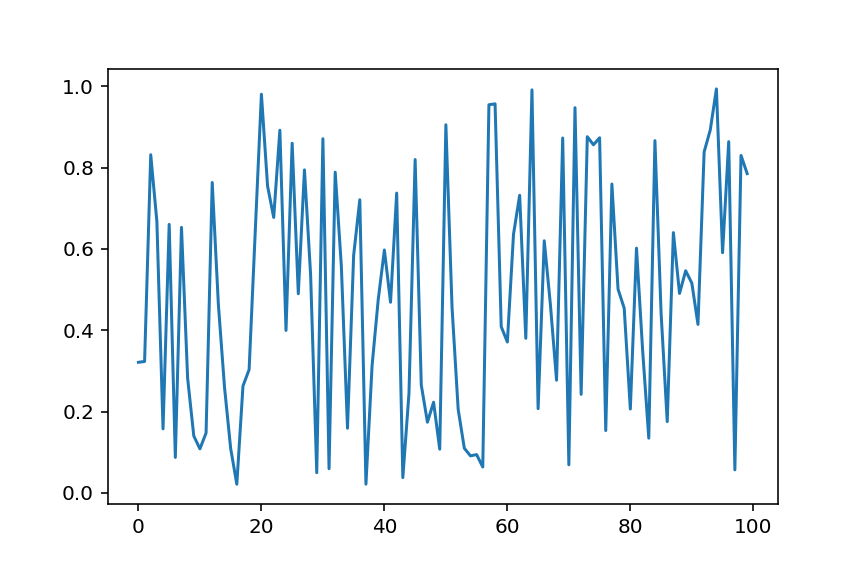

In [189]:
# interractive matplotlib plots
%matplotlib notebook

plt.plot(np.random.rand(100))

In [31]:
# embedding a video in presentation slide 
# try with another browser
from IPython.display import YouTubeVideo
yt = YouTubeVideo('https://youtu.be/i-icXZ2tMRM', width = 600, height = 400)
display(yt)

In [32]:
%%HTML
<video width="320" height="240" controls>
  <source src="https://you.tube/i-icXZ2tMRM" type="video/mp4">
</video>

In [28]:
# embedding a research paper
# you could use this in the references section of your paper 
from IPython.display import HTML

HTML('<iframe src="files/ebiokit.research.paper.pdf" width=800 height=400></iframe>')

Review 

1. Styling
2. Extensions
3. Magics
4. Interactive visualizations and data exploration tools

# Conclusion

Jupyter has a lot of tools to make reports and makes sharing findings to be people easier. It also has support for many programmming languages empowering you not to slow down and always move forward.

# References

https://github.com/deepsense-ai/pydatawarsaw-notebooks/blob/master/presentation.ipynb

https://www.youtube.com/watch?time_continue=1&v=b8g-8T0amuk

https://github.com/Shuyib/Phylogenetic-tree-study

https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

Where to learn more about Bioinformatics
* rosalind.info
* edx.org and coursera.org
* Data analysis for life sciences by Rafael Irizzary (leanpub.com)
* Finding Hidden Messages in DNA by Pavel Pevzner and Philip Compeau (leanpub.com)

Thank you for coming!